# Voorbeeld met alle kansbegrippen

Een school met 1000 studenten, waarvan 480 vrouwen en 520 mannen.

Van de studentes hebben er **200** een lidkaart van de **bibliotheek**. 
Slechts **100** mannelijke studenten hebben een lidkaart van de bibliotheek.

# Theorie
##  Toevalsveranderlijken

Een toevalsveranderlijke is een variabele die een onzekerheid weergeeft. Je kan het een beetje vergelijken met een 
**variabele in een programmeertaal** waaraan je willekeurig een waarde toekent.
_Eigenlijk beeldt een toevalsveranderlijke de uitkomst van een experiment af op een reël getal. Het gooien van een dobbelsteen produceert "stippen". De toevalsveranderlijke beeldt deze af op de getallen 1,2,3,4,5,6_

**Kristallen bol analogie**
Je kan het ook beschouwen als een soort kristallen bol waar door toeval een waarde in verschijnt. De mogelijke waarden
 die kunnen verschijnen zijn de mogelijke uitkomsten van een experiment.

## Twee soorten toevalsveranderlijken
Er zijn twee soorten toevalsveranderlijken:
* **Discrete toevalsveranderlijken** hebben een beperkt aantal mogelijke waarden. Bijvoorbeeld het aantal ogen op een dobbelsteen.
* **Continue toevalsveranderlijken** hebben een oneindig aantal mogelijke waarden. Bijvoorbeeld de lengte van een persoon.

## Toevalsexperiment
Door te experimenteren kan je de mogelijke waarden van een toevalsveranderlijke bepalen. Je kan tellen hoe vaak een 
bepaalde uitkomst voorkomt. Deze uitkomsten noemen we de **waarnemingen**.
De relatieve frequentie van een bepaalde uitkomst noemen we de **kans** voor die waarneming. De verdeling van de kansen we de **kansverdeling** of distributie. De som van alle kansen in de kansverdeling is 1.

* $U$ is de verzameling van alle mogelijke uitkomsten van een toevalsexperiment.
    * $U = \{1~stip,2~stippen,3~stippen,4~stippen,5~stippen,6~stippen\}$, de uitkomsten van het gooien van een dobbelsteen.
* $G$ is een gebeurtenis, een deelverzameling van $U$.
    * $G = \{2~stippen,4~stippen,6~stippen\}$, de gebeurtenis dat je een **even aantal stippen** gooit.   
* $X$ is een toevalsveranderlijke, deze beeldt de **elementaire uitkomsten** van een toevalsexperiment af op een reëel getal.
    * formeel: $X: U \rightarrow \mathbb{R}~;~u \mapsto X(u)$
    * $X(2~stippen) = 2$, $X(4~stippen) = 4$, $X(6~stippen) = 6$   
* $x$ is een waarde die $X$ kan aannemen.
    * $x = 2$, $x = 4$, $x = 6$   
* $P(X=x)$ is de kans dat $X$ de waarde $x$ aanneemt, het is een functie die de waarschijnlijkheid van een waarneming bepaalt, de zogenaamde kansfunctie.
    * formeel: $P: \mathbb{R} \rightarrow [0,1]~;~x \mapsto P(X=x)$
    * $P(X=2) = \frac{1}{6}$, $P(X=4) = \frac{1}{6}$, $P(X=6) = \frac{1}{6}$
    * $P(X=2) + P(X=4) + P(X=6) = \frac{1}{6} + \frac{1}{6} + \frac{1}{6} = \frac{3}{6} = \frac{1}{2}$, de kans dat je een even aantal gooit. 
* $P(G) = \frac{aantal~waarnemingen~in~G}{aantal~waarnemingen~in~U}$. Deze formule heet de **Regel van Laplace**.         
    * $P(G) = \frac{\#G}{\#U} =\frac{3}{6} = \frac{1}{2}$, de kans dat je een even aantal stippen gooit.     

## Toevalsveranderlijken in ons voorbeeld
We hebben hier **twee discrete** toevalsveranderlijken, namelijk:

$S = \{m,v\}$\, student kan mannelijk of vrouwelijk zijn\
$L = \{j,n\}$, lidmaatschap, ja of nee

## Tabel met de aantallen
We maken een kruistabel met het aantal studenten per geslacht en lidmaatschap.

In [1]:
# deze code is illustratief, je hoeft dit niet te begrijpen

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

from scripts.scripts import highlight_row, highlight_col, highlight_cell

studenten = np.repeat(['m', 'v'], [520, 480])
lidmaatschap = np.concatenate([np.repeat(['j', 'n'], [100, 420]), np.repeat(['j', 'n'], [200, 280])])

school = pd.DataFrame(zip(studenten, lidmaatschap), columns=['Student', 'Lidmaatschap'], index=range(1, 1001)).sample(
    frac=1)
school.head()

kruistabel = pd.crosstab(lidmaatschap, studenten, rownames=['L'], colnames=['S'], margins=True)
kruistabel

S      m    v   All
L                  
j    100  200   300
n    420  280   700
All  520  480  1000

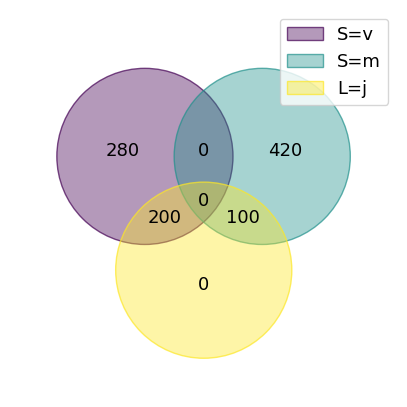

In [2]:
# deze code is illustratief, je hoeft dit niet te begrijpen
from scripts.scripts import plot_venn

vrouwen = studenten[studenten == 'v']
leden = studenten[lidmaatschap == 'j']
mannen = studenten[studenten == 'm']

plot_venn([vrouwen, mannen, leden], ['S=v', 'S=m', 'L=j'], figsize=(5, 10))

## Tabel met kansen

In [3]:
# deze code is illustratief, je hoeft dit niet te begrijpen
kruistabel_prob = kruistabel / kruistabel.loc['All', 'All']
kruistabel_prob

S       m     v  All
L                   
j    0.10  0.20  0.3
n    0.42  0.28  0.7
All  0.52  0.48  1.0

## Notatie van kansen

$P(X=x)$, lees wat is de kans dat toevalsveranderlijke $X$ de waarde $x$ aanneemt.
Soms ook deze notatie $p(x)$ als er geen verwarring mogelijk is.

Voorbeelden, toegepast op de studenten:
$P(S=v)$ of $p(v)$\
$P(L=j)$ of $p(j)$


# Regel van Laplace

De regel van Laplace is een eenvoudige formule om de kans op een gebeurtenis te berekenen.

_De kans op een gebeurtenis is gelijk aan het aantal uitkomsten dat tot de gebeurtenis behoort, gedeeld door het aantal mogelijke uitkomsten._


## Kans op een studente
De kans dat een student een vrouw is.

$P(S=v) = \frac{200 + 280}{1000} = \frac{480}{1000} = 0.48$

Merk op dat dit overeen komt met de som van de waarden in de kolom 'S=v' van de tabel. We komen hier later op terug in de paragraaf over de totale kans.

## Kans om geen lid te zijn van de bibliotheek
De kans dat een student geen lidkaart heeft van de bibliotheek.

$P(L=n) = \frac{420+280}{1000} = \frac{700}{1000} = 0.7$

Merk op dat dit overeen komt met de som van de waarden in de rij 'L=n' van de tabel. We komen hier later op terug in de paragraaf over de totale kans.


# Somregel

De somregel is een formule om de kans op het optreden van een deelgebeurtenis te berekenen.  De formule is:

$P(A \cup B) = P(A) + P(B) - P(A \cap B)$


## Kans op een vrouwelijke student of een mannelijke student

De kans dat een student een vrouw is of een man is is:

$P(S=v \cup S=m) = P(S=v) + P(S=m) - P(S=v \cap S=m)$\
$P(S=v \cup S=m) = 0.48 + 0.52 - 0 = 1$

_Dit zijn niet-overlappende gebeurtenissen, dus $P(S=v \cap S=m) = 0$._


S       m     v  All
L                   
j    0.10  0.20  0.3
n    0.42  0.28  0.7
All  0.52  0.48  1.0

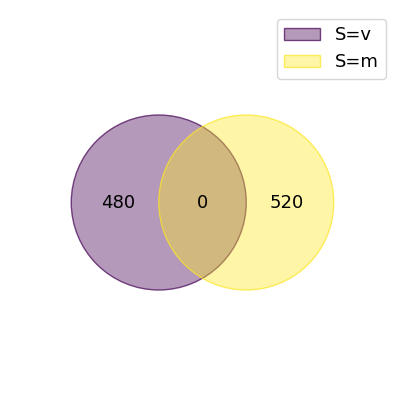

In [4]:
# deze code is illustratief, je hoeft dit niet te begrijpen
from scripts.scripts import plot_venn

vrouwen = studenten[studenten == 'v']
mannen = studenten[studenten == 'm']

plot_venn([vrouwen, mannen], ['S=v', 'S=m'], figsize=(5, 5))

kruistabel_prob

## Kans op studente of een lid van de bibliotheek.

De kans op een studente of student met een lidkaart van de bibliotheek.

$P(S=v \cup L=j) = P(S=v) + P(L=j) - P(S=v \cap L=j)$\
\
$\phantom{P(S=v \cup L=j)} = 0.48 + 0.3 - 0.2 = 0.58$

_Dit zijn overlappende gebeurtenissen, dus $P(S=v \cap L=j) = 0.2$._


S      m    v   All
L                  
j    100  200   300
n    420  280   700
All  520  480  1000

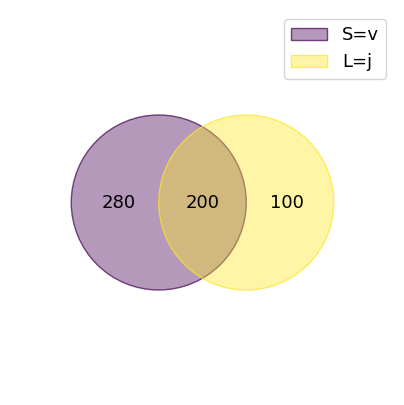

In [5]:
# deze code is illustratief, je hoeft dit niet te begrijpen
vrouwen = studenten[studenten == 'v']
leden = studenten[lidmaatschap == 'j']
plot_venn([vrouwen, leden], ['S=v', 'L=j'], figsize=(5, 5))

kruistabel

## Kans op een studente, een lid of een (mannelijke) student

$P(S=v \cup L=j \cup S=m) = P(S=v) + P(L=j) + P(S=m) - P(S=v \cap L=j)\ - P(S=m \cap L=j) - P(S=v \cap S=m) + P(S=v \cap L=j \cap S=m)$\
$P(S=v \cup L=j \cup S=m) = 0.48 + 0.3 + 0.52 - 0.2 - 0.1 - 0 + 0 = 1$

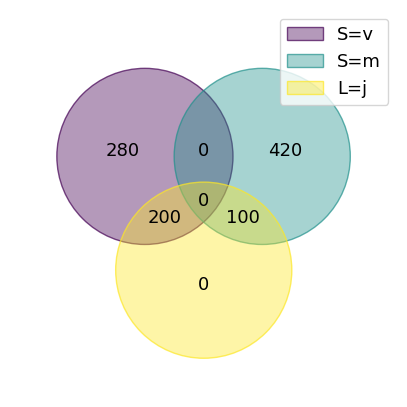

In [6]:
# deze code is illustratief, je hoeft dit niet te begrijpen
vrouwen = studenten[studenten == 'v']
leden = studenten[lidmaatschap == 'j']
mannen = studenten[studenten == 'm']
plot_venn([vrouwen, mannen, leden], ['S=v', 'S=m', 'L=j'], figsize=(5, 10))

# Voorwaardelijke kans

## Kans op een vrouwelijke student, gegeven dat de persoon lid is van de bibliotheek

$P(S=v \mid L=j) = \frac{P(S=v \cap L=j)}{P(L=j)} = \frac{0.2}{0.3} = 0.667$

In [7]:
# deze code is illustratief, je hoeft dit niet te begrijpen
kruistabel_prob.style.apply(highlight_row, color='lightblue', row_label='j').apply(highlight_cell,
                                                                                   col_label='v', row_label='j')

## Kans op een studente, gegeven dat de persoon geen lid is van de bibliotheek

$P(S=v \mid L=n) = \frac{P(S=v \cap L=n)}{P(L=n)} = \frac{0.28}{0.7} = 0.4$


In [8]:
# deze code is illustratief, je hoeft dit niet te begrijpen
kruistabel_prob.style.apply(highlight_row, color='lightblue', row_label='n').apply(highlight_cell,
                                                                                   col_label='v', row_label='n')

## De kans op lidmaatschap van de bibliotheek, gegeven dat de persoon een studente is

$P(L=j \mid S=v) = \frac{P(S=v \cap L=j)}{P(S=v)} = \frac{0.2}{0.48} = 0.417$


In [9]:
# deze code is illustratief, je hoeft dit niet te begrijpen
kruistabel_prob.style.apply(highlight_col, color='lightblue', col_label='v').apply(highlight_cell, col_label='v',
                                                                                   row_label='j')

# Productregel

De productregel is een formule om de kans te berekenen op het **gelijktijdig of in sequentie** optreden van twee deelgebeurtenissen.\
De formule is:

$P(A \cap B) = P(A) \cdot P(B|A)$\
$P(A \cap B) = P(B) \cdot P(A|B)$


## Kans dat een persoon een studente is en ook lid van de bibliotheek

We kunnen dit rechtstreeks uit de tabel aflezen:

$P(S=v \cap L=j) = 0.2$\
of
$P(S=v,L=j) = 0.2$\
of zelfs
$P(v,j) = 0.2$

In [10]:
# deze code is illustratief, je hoeft dit niet te begrijpen
kruistabel_prob.style.apply(highlight_cell, col_label='v', row_label='j', color='red')

Maar we kunnen ook de productregel gebruiken in combinatie met voorwaardelijke kansen:

$P(S=v, L=j) = P(S=v) \cdot P(L=j|S=v)$\
\
$\phantom{P(S=v, L=j)} = 0.48 \cdot 0.4166 = 0.2$


## Afhankelijk vs onafhankelijk

We kennen de productregel in 2 vormen:

$P(A \cap B) = P(A) \cdot P(B \mid A)$\
$P(A \cap B) = P(B) \cdot P(A \mid B)$

Als de gebeurtenissen echter onafhankelijk zijn, dan vereenvoudigt dit tot:
\
$P(A \cap B) = P(A) \cdot P(B)$

omdat de kans op het optreden van deelgebeurtenis B onafhankelijk is van de deelgebeurtenis A, en andersom, dus:

$P(A|B) = P(A)$\
$P(B|A) = P(B)$

Kortere notaties:
$P(A,B) = P(A) \cdot P(B|A)$\
$P(A,B) = P(B) \cdot P(A|B)$


## Wat is de kans dat een persoon op de campus tegelijk lid is en geen lid is?

### Zijn de gebeurtenissen onafhankelijk?
$P(L=j, L=n) = P(L=j) \cdot P(L=n)$\
\
$\phantom{P(L=j, L=n)} = 0.3 \cdot 0.7$
\
$\phantom{P(L=j, L=n)} = 0.21$

<font color="red">_Dit is uiteraard fout!_</font>, want de gebeurtenissen zijn afhankelijk. 

### Zijn de gebeurtenissen afhankelijk?

$P(L=j, L=n) = P(L=j) \cdot P(L=n|L=j)$\
\
$\phantom{P(L=j, L=n)} = 0.3 \cdot 0$
\
$\phantom{P(L=j, L=n)} = 0$

<font color="green">_Dit is juist_</font>, want de gebeurtenissen zijn afhankelijk.


# Totale kans of marginaalkans

De totale kans van een gebeurtenis $A$ is dus de som van de kansen op het optreden van deelgebeurtenis $A$ in combinatie met alle mogelijke deelgebeurtenissen $B_i$.
\
$P(A) = P(A, B_1) + P(A, B_2) + \dots + P(A, B_n)$

We kunnen dit ook schrijven als:

$P(A) = \sum_{i=1}^n P(A, B_i)$

Of ook nog als:
\
$P(A) = \sum_{b \in B} P(A,B=b)$

Of ook nog als:

$P(A) = \sum_{b \in B} P(A) \cdot P(B=b \mid A)$


## Kans dat een persoon een studente is

$P(S=v) = \sum_{l \in L} P(S=v, L=l)$

\
$\phantom{P(S=v)} = P(S=v, L=j) + P(S=v, L=n)$

\
$\phantom{P(S=v)} = 0.2 + 0.28 = 0.48$


In [11]:
# deze code is illustratief, je hoeft dit niet te begrijpen
kruistabel_prob.style.apply(highlight_cell, color='blue', col_label='v', row_label='j').apply(highlight_cell,
                                                                                              color='blue',
                                                                                              col_label='v',
                                                                                              row_label='n')

## Kans dat een persoon een lidmaatschap heeft

$P(L=j) = \sum_{s \in S} P(L=j,S=s)$

\
$\phantom{P(L=j)} = P(L=j, S=v) + P(L=j,S=m)$

\
$\phantom{P(L=j)} = 0.2 + 0.1 = 0.3$


In [12]:
# deze code is illustratief, je hoeft dit niet te begrijpen
kruistabel_prob.style.apply(highlight_cell, color='blue', col_label='v',
                            row_label='j').apply(highlight_cell, color='blue',
                                                 col_label='m',
                                                 row_label='j')

## Kans op een studente versie 2

$P(S=v) = \sum_{l \in L} P(S=v, L=l)$

\
$\phantom{P(S=v)} = \sum_{l \in L} P(S=v) \cdot P(L=l \mid S=v)$

\
$\phantom{P(S=v)} = P(S=v) \cdot P(L=j \mid S=v) + P(S=v) \cdot P(L=n \mid S=v)$

\
$\phantom{P(S=v)} = 0.48 \cdot 0.4167 + 0.48 \cdot 0.5833$

\
$\phantom{P(S=v)} = 0.48$


# Wet van Bayes

De wet van Bayes is een formule die de kans op een gebeurtenis $A$ berekent, gegeven de kans op een andere gebeurtenis $B$.

De formule is:

$P(A \mid B) = \frac{P(A , B)}{P(B)}$

\
$P(A \mid B) = \frac{P(A) \cdot  P(B \mid A) }{P(B)}$

\
$posterior = \frac{prior \cdot  likehood }{evidence}$


## Kans dat een persoon een studente is, gegeven dat ze een lidmaatschap heeft

$P(S=v \mid L=j) = \frac{P(S=v, L=j)}{P(L=j)}$

\
$\phantom{P(S=v \mid L=j)} = \frac{P(S=v) \cdot P(L=j \mid S=v)}{P(L=j)}$

\
$\phantom{P(S=v \mid L=j)} = \frac{0.48 \cdot 0.4167}{0.3}$

\
$\phantom{P(S=v \mid L=j)} = 0.67$


## Kans dat een persoon een studente is, gegeven dat ze een lidmaatschap heeft

$P(S=v \mid L=j) = \frac{P(S=v, L=j)}{P(L=j)}$

\
$\phantom{P(S=v \mid L=j)} = \frac{P(S=v) \cdot P(L=j \mid S=v)}{\sum_{s\in S} P(L=j, S=s)}$

\
$\phantom{P(S=v \mid L=j)} = \frac{P(S=v) \cdot P(L=j \mid S=v)}{P(S=v) \cdot P(L=j \mid S=v) + P(S=m) \cdot P(L=j \mid S=m)}$

\
$\phantom{P(S=v \mid L=j)} = \frac{0.48 \cdot 0.4167}{0.48 \cdot 0.4167 + 0.52 \cdot 0.1923}$

\
$\phantom{P(S=v \mid L=j)} = 0.67$
